<a href="https://colab.research.google.com/github/mharrue-Git/MlO/blob/main/Desercion_Estudiantil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deserción Estudiantil




In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

import pickle

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Desercion_acotado.csv to Desercion_acotado.csv


In [3]:
df = pd.read_csv('Desercion_acotado.csv', sep=',')
#df = pd.read_csv(r'C:\Users\n33358\Downloads\Desercion.csv')
df.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Gender,Age at enrollment,Target
0,1,8,2,1,1,1,13,10,6,10,1,20,Dropout
1,1,6,11,1,1,1,1,3,4,4,1,19,Enrolled
2,1,1,5,1,1,1,22,27,10,10,1,19,Dropout
3,1,8,15,1,1,1,23,27,6,4,0,20,Dropout
4,2,12,3,0,1,1,22,28,10,10,0,45,Dropout


In [4]:
df.shape

(4424, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Marital status              4424 non-null   int64 
 1   Application mode            4424 non-null   int64 
 2   Course                      4424 non-null   int64 
 3   Daytime/evening attendance  4424 non-null   int64 
 4   Previous qualification      4424 non-null   int64 
 5   Nacionality                 4424 non-null   int64 
 6   Mother's qualification      4424 non-null   int64 
 7   Father's qualification      4424 non-null   int64 
 8   Mother's occupation         4424 non-null   int64 
 9   Father's occupation         4424 non-null   int64 
 10  Gender                      4424 non-null   int64 
 11  Age at enrollment           4424 non-null   int64 
 12  Target                      4424 non-null   object
dtypes: int64(12), object(1)
memory usage: 449.4+ KB


In [6]:
df.describe()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Gender,Age at enrollment
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,7.819168,0.351718,23.265145
std,0.605747,5.298964,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,0.477560,7.587816
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,17.000000
25%,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,19.000000
50%,1.000000,8.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,0.000000,20.000000
75%,1.000000,12.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,25.000000
max,6.000000,18.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,46.000000,1.000000,70.000000


In [7]:
df.isnull().sum()

Marital status                0
Application mode              0
Course                        0
Daytime/evening attendance    0
Previous qualification        0
Nacionality                   0
Mother's qualification        0
Father's qualification        0
Mother's occupation           0
Father's occupation           0
Gender                        0
Age at enrollment             0
Target                        0
dtype: int64

In [8]:
df.duplicated().sum()

94

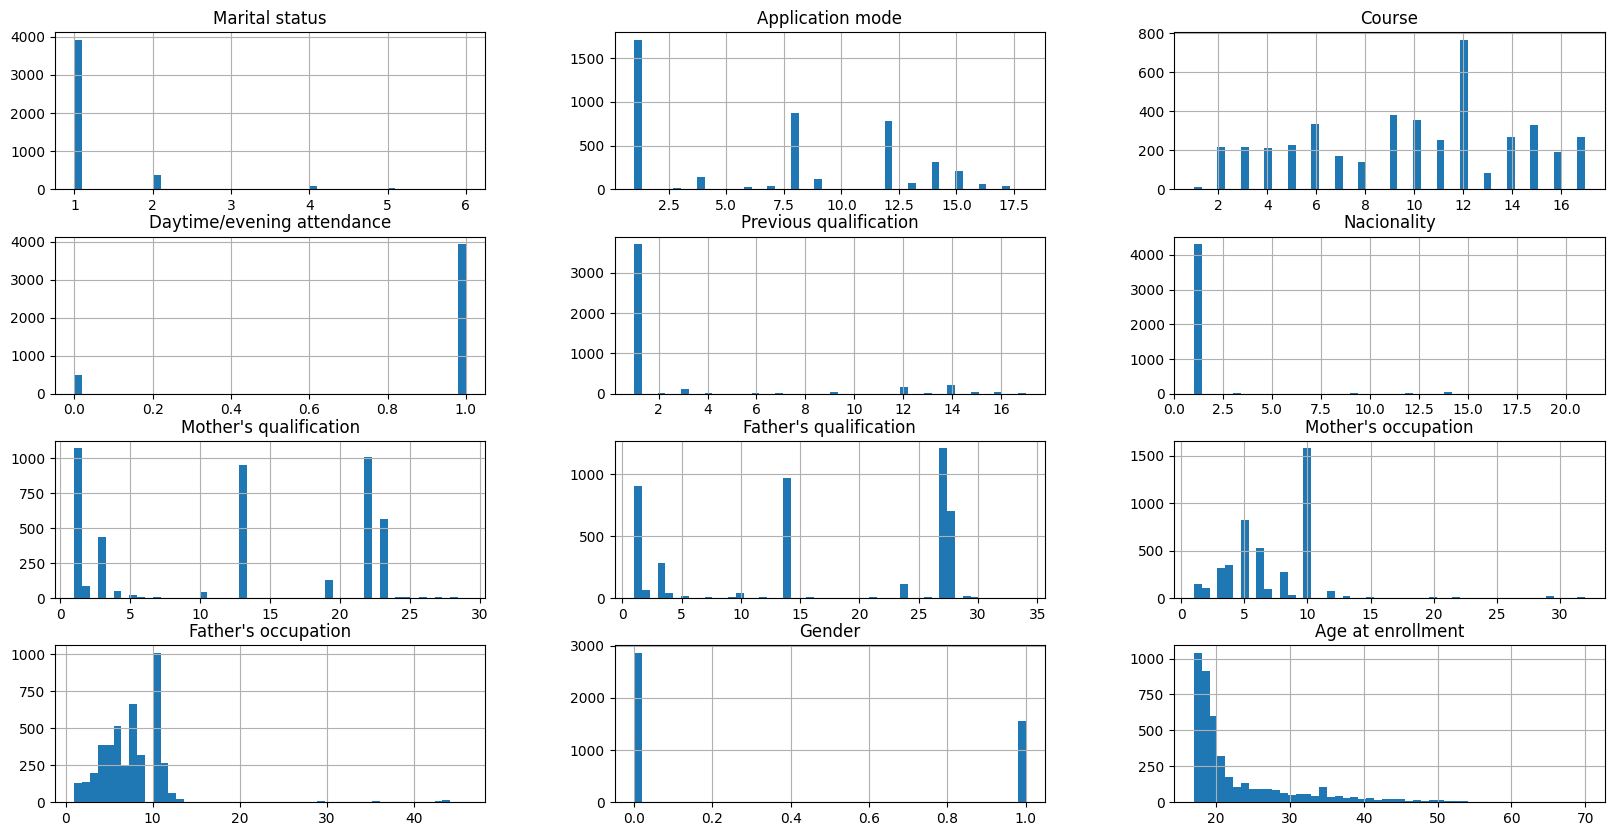

In [9]:
df[[x for x in df.columns]].hist(bins=50, figsize=(20,10));

In [10]:
df['Age at enrollment'].unique().min()#17
df['Age at enrollment'].unique().max()#70
df['Gender'].unique()# binario
df['Nacionality'].unique()# Múltiples
df['Marital status'].unique()#[1, 2, 4, 3, 5, 6]
df['Target'].unique()#

array(['Dropout', 'Enrolled'], dtype=object)

In [11]:
df['Target'].value_counts()

Enrolled    2628
Dropout     1796
Name: Target, dtype: int64

In [12]:
Abandono_genero = pd.crosstab(df['Gender'],df['Target'])
display(Abandono_genero)

Target,Dropout,Enrolled
Gender,,
0,1023,1845
1,773,783


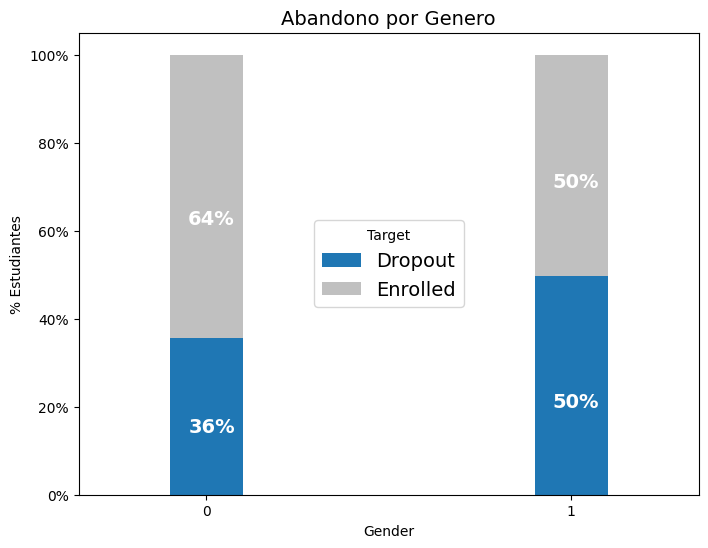

In [13]:
Gender_dropout = df.groupby(['Gender','Target']).size().unstack()
colors = ['#1f77b4','#C0C0C0', '#AB70C0']
ax = (Gender_dropout.T*100.0 / Gender_dropout.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Target')
ax.set_ylabel('% Estudiantes')
ax.set_title('Abandono por Genero',size = 14)

# Labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [14]:
Abandono_Estado_civil = pd.crosstab(df['Marital status'],df['Target'])
display(Abandono_Estado_civil)

Target,Dropout,Enrolled
Marital status,,
1,1531,2388
2,202,177
3,1,3
4,47,44
5,11,14
6,4,2


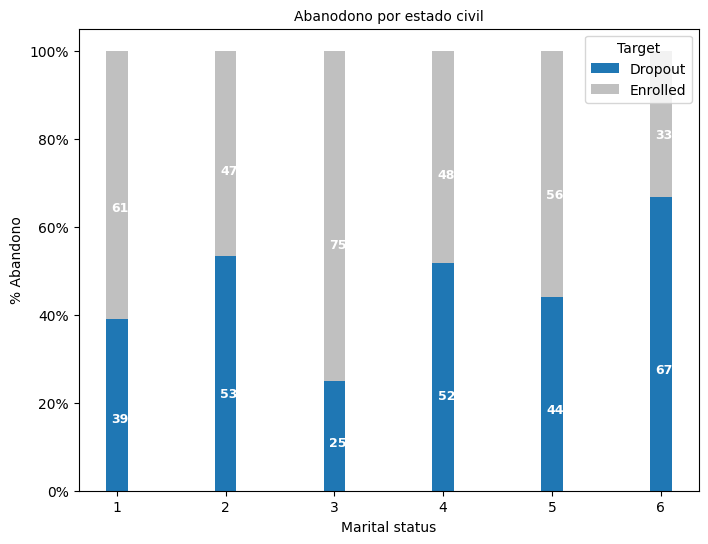

In [15]:
Marital_Dropout = df.groupby(['Marital status','Target']).size().unstack()
colors = ['#1f77b4','#C0C0C0', '#AB70C0']
ax = (Marital_Dropout.T*100.0 / Marital_Dropout.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':10},title = 'Target')
ax.set_ylabel('% Abandono')
ax.set_title('Abanodono por estado civil',size = 10)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =9)

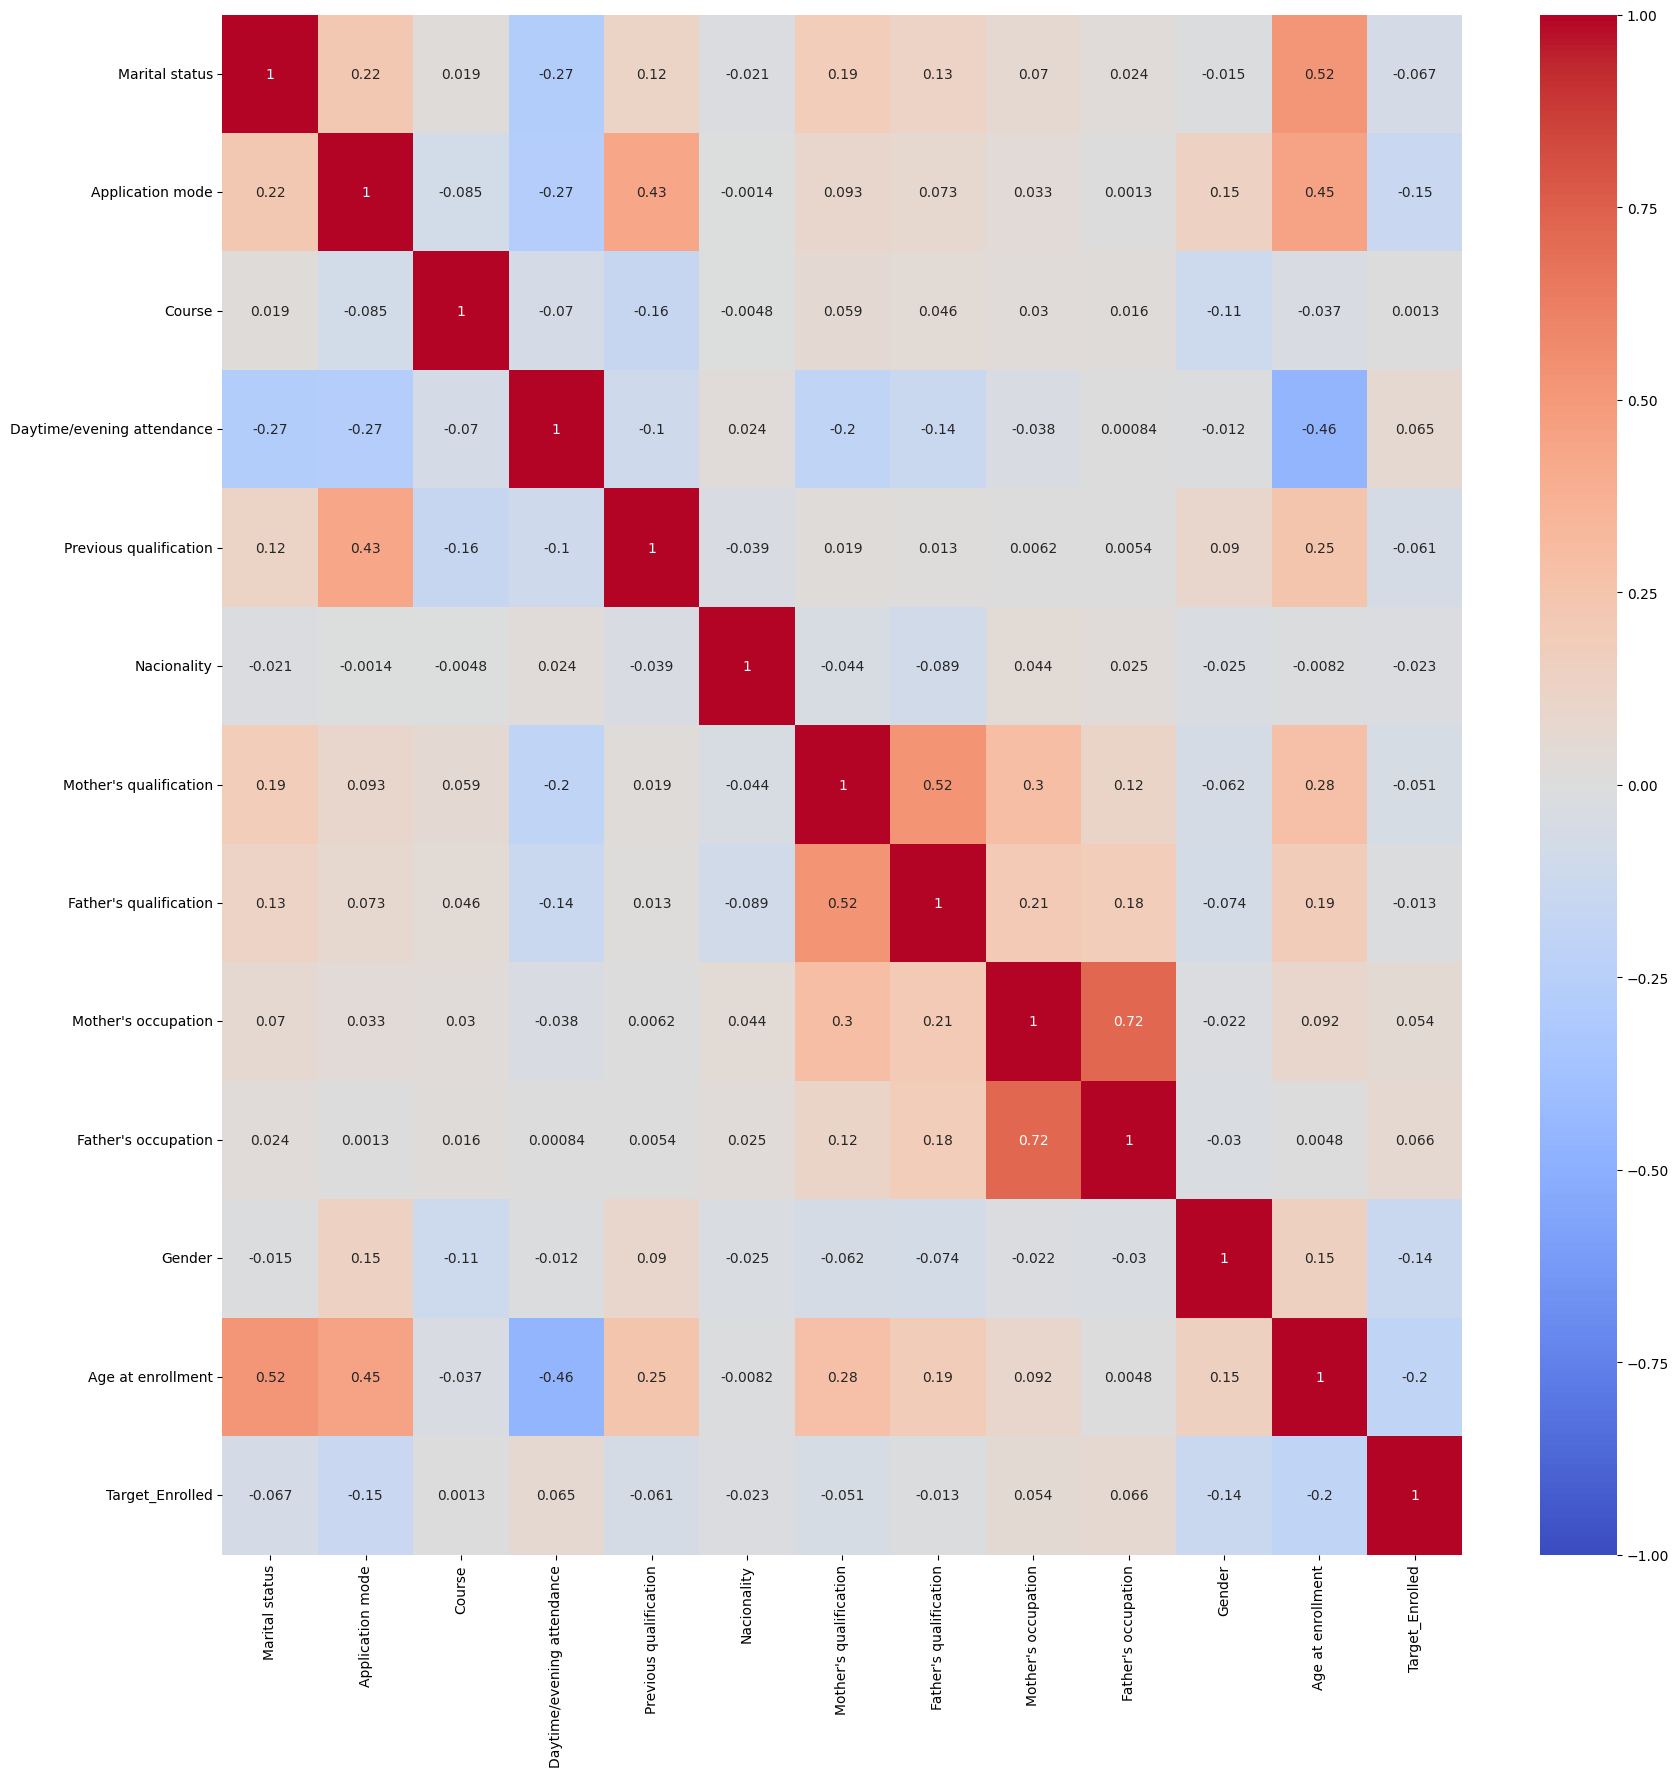

In [16]:
col=[c for c in df.columns]
data_dummies =pd.get_dummies(df[col], drop_first = True)
#Analisis de correlaciones entre variables numericas
plt.figure(figsize=(20,20))
sns.heatmap(data_dummies.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm');

In [17]:
data_dummies.sample(20)

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Gender,Age at enrollment,Target_Enrolled
2149,1,1,10,1,1,1,23,27,6,6,0,20,1
2610,1,8,12,1,1,1,1,28,6,9,0,18,1
3615,1,8,14,1,1,1,13,1,6,5,1,18,0
4131,1,12,12,1,1,1,13,1,2,2,0,25,1
3832,1,14,5,1,1,1,22,27,10,10,1,34,1
1674,1,8,12,1,1,1,1,1,5,10,0,18,1
1066,1,1,12,1,1,1,23,27,6,7,0,19,1
3132,1,1,8,1,1,1,3,1,3,5,0,18,1
1505,1,8,15,1,1,1,23,28,8,8,0,19,0
3976,1,1,12,1,1,1,13,14,10,8,0,18,1


In [18]:
encoder = LabelEncoder()
col=[c for c in df.columns]
data_dummies =pd.get_dummies(df[col], drop_first = True)
X = data_dummies.drop("Target_Enrolled", axis = 1)
y = encoder.fit_transform(data_dummies["Target_Enrolled"])

In [19]:
#Separamos el dataset en Train y Test
rs=5
y = data_dummies['Target_Enrolled']
X = data_dummies.drop(columns = ['Target_Enrolled'])
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.35, random_state=rs)

In [20]:
# Verificamos los shapes y los tipos de X e y:
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Shape X: (4424, 12)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (4424,)
Type y: <class 'pandas.core.series.Series'>
X_train shape: (2875, 12)
X_test shape: (1549, 12)


In [21]:
#Hacemos la regresión logística
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)

y_pred_train_proba = reg_log.predict_proba(X_train)

y_pred_test = reg_log.predict(X_test)
y_pred_train = reg_log.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#Vemos como resultan los coeficientes de la regresión.
reg_log.coef_

array([[ 0.04713379, -0.02579804, -0.01244786, -0.22717467,  0.01541928,
        -0.04768984, -0.0096087 ,  0.0073024 ,  0.03688896,  0.005227  ,
        -0.45657999, -0.05416391]])

In [23]:
#Observamos el Accuracy  del set de Entrenamiento y el de Test
from sklearn.metrics import accuracy_score

print('Accuracy en el set de entrenamiento = {:.4f}'.format(accuracy_score (y_train, y_pred_train)))

print('Accuracy en el set de testeo = {:.4f}'.format(accuracy_score (y_test, y_pred_test)))

Accuracy en el set de entrenamiento = 0.6410
Accuracy en el set de testeo = 0.6391


In [24]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'v', '^')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
   #se pueden probar por separado para ver que hace cada uno
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=colors[idx],
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='gray',
                    alpha=0.3,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [25]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

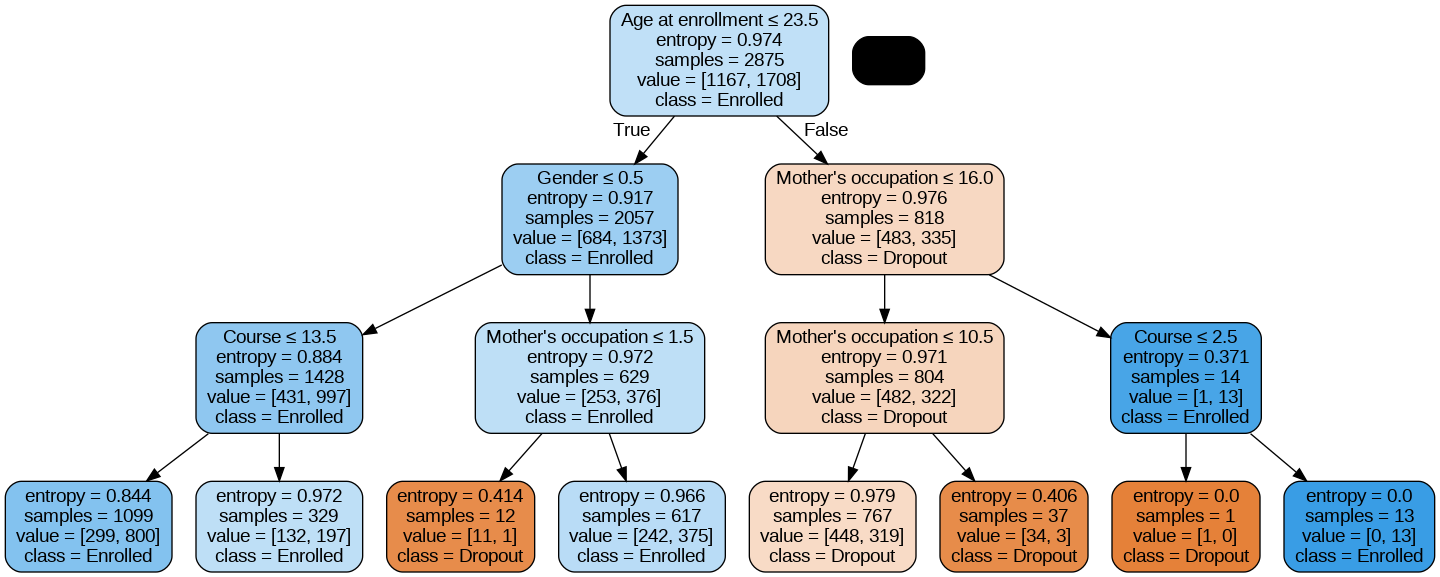

In [26]:
dot_data=export_graphviz(tree, out_file=None,
                feature_names=X_train.columns,
                class_names=['Dropout', 'Enrolled'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [27]:
def fit_random_forest(X_train, y_train):

    rfc = RandomForestClassifier(n_jobs=-1, criterion = 'entropy', random_state = 0, max_features= 'sqrt')

    param_grid = {
               "n_estimators" : [5, 8, 10],
               "max_depth" : [4, 5, 6],
               "min_samples_leaf" : [8, 10, 12]}

    CV_rf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

    CV_rf.fit(X_train, y_train)
    print(f'best_params: {CV_rf.best_params_}')

    file_name = 'model.pkl'
    with open(os.path.join(FOLDER, file_name), 'wb') as f:
        pickle.dump(model, f)

    return CV_rf

In [28]:
file_name = 'model.pkl'
with open(file_name, 'wb') as f:
    pickle.dump(reg_log, f)

In [29]:
!pip freeze > requeriments.txt